# Customer Life Time Value Predition

## Following Libraries are used for this project:

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(20, 10))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (20, 20)

# Size of matplotlib histogram bins
bin_size = 10

### Reading the data from CSV

In [2]:
df = pd.read_csv("CLV_Data.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,AA10041,California,7901.744238,No,Basic,High School or Below,02/02/11,Unemployed,M,0.0,...,83.0,0.0,5.0,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize
1,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167.0,...,99.0,3.0,1.0,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize
2,AA16582,Washington,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072.0,...,3.0,0.0,2.0,Personal Auto,Personal L2,Offer1,Agent,511.200000,Four-Door Car,Medsize
3,AA30683,California,6595.101921,No,Premium,Bachelor,1/15/11,Unemployed,M,0.0,...,38.0,2.0,7.0,Personal Auto,Personal L3,Offer1,Web,847.717402,Four-Door Car,Medsize
4,AA34092,California,28799.954150,No,Extended,College,02/11/11,Employed,M,33635.0,...,23.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Web,1152.000000,Luxury SUV,Medsize


In [4]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,ZZ77357,Nevada,4468.220900,No,Basic,High School or Below,01/09/11,Unemployed,M,0.0,...,61.0,0.0,9.0,Corporate Auto,Corporate L2,Offer1,Agent,468.000000,Two-Door Car,Medsize
9130,ZZ83340,Oregon,5508.315536,No,Basic,Doctor,02/04/11,Employed,F,96021.0,...,30.0,0.0,5.0,Personal Auto,Personal L1,Offer3,Branch,315.004602,Two-Door Car,Medsize
9131,ZZ89380,Oregon,3196.578455,No,Extended,Bachelor,01/10/11,Employed,F,62815.0,...,84.0,0.0,1.0,Special Auto,Special L1,Offer2,Call Center,47.061469,Two-Door Car,Large
9132,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0.0,...,56.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small
9133,ZZ97035,California,20714.940430,No,Extended,College,02/01/11,Unemployed,M,0.0,...,66.0,0.0,2.0,Corporate Auto,Corporate L1,Offer1,Branch,2027.724442,Luxury Car,Small


## Exploring the dataset

### Calculating number of rows and columns

In [5]:
print("Total Number of Columns: ", df.shape[1])
print("Total Number of Rows: ", df.shape[0])

Total Number of Columns:  24
Total Number of Rows:  9134


### Calculating total number null values

In [6]:
print("Total number of Null Values: ", df.isnull().sum().sum())

Total number of Null Values:  925


### Data Types of each column

In [7]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Basic information of data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9081 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9081 non-null   f

### Various descriptive statistics on the DataFrame

In [9]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9081.000000,9081.000000,9081.000000,9083.000000,9087.000000,9107.000000,9134.000000
mean,8004.940475,37631.804317,93.218478,15.102962,48.052406,0.385386,2.966509,434.088794
std,6870.967608,30386.530349,34.423683,10.075916,27.880251,0.912190,2.390698,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33881.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62271.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Correlation Matrix

In [10]:
cor_mat = df.corr() 
cor_mat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.025197,0.396750,0.011341,0.009627,-0.036822,0.022065,0.226451
Income,0.025197,1.000000,-0.016457,-0.025196,-0.000988,0.007091,-0.009461,-0.355679
Monthly Premium Auto,0.396750,-0.016457,1.000000,0.005255,0.022409,-0.012493,-0.012119,0.631944
Months Since Last Claim,0.011341,-0.025196,0.005255,1.000000,-0.041670,0.004814,0.009374,0.006805
Months Since Policy Inception,0.009627,-0.000988,0.022409,-0.041670,1.000000,-0.000736,-0.012581,0.004275
Number of Open Complaints,-0.036822,0.007091,-0.012493,0.004814,-0.000736,1.000000,0.001953,-0.014549
Number of Policies,0.022065,-0.009461,-0.012119,0.009374,-0.012581,0.001953,1.000000,-0.002169
Total Claim Amount,0.226451,-0.355679,0.631944,0.006805,0.004275,-0.014549,-0.002169,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

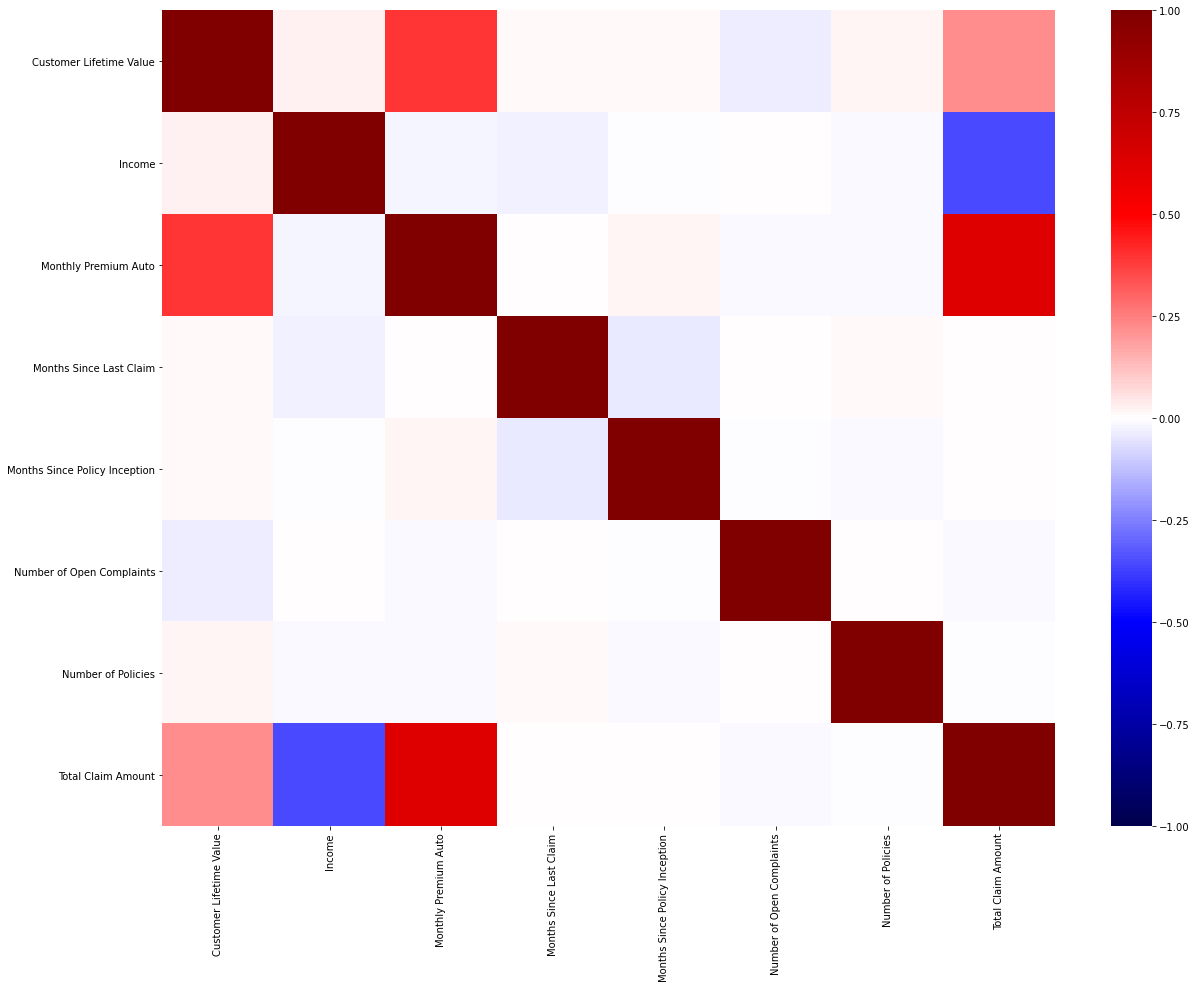

In [11]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(cor_mat, vmin = -1, vmax = 1, cmap= "seismic")
plt.gca().patch.set(hatch = "df", edgecolor = "#555")
plt.show

From the correlation matrix we can infer that Monthly Premium Auto and Total Claim Amount are highly correlated with the target variable Customer Lifetime Value.

### Features' impact on Target Variable (Customer Lifetime Value)

### Feature: Response

In [12]:
df[['Customer Lifetime Value', 'Response']].groupby('Response').median() 

,Customer Lifetime Value
Response,
No,5808.463583
Yes,5597.124960


<AxesSubplot:>

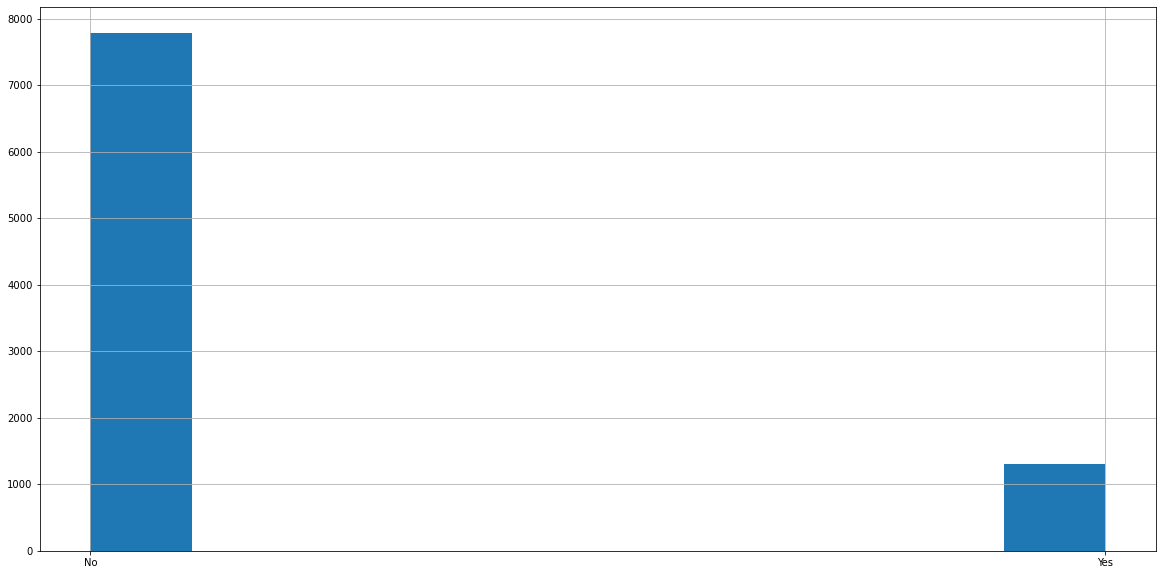

In [13]:
df['Response'].hist()

In [14]:
df[['Gender', 'Response']].groupby('Gender').count() 

,Response
Gender,
F,4625
M,4437


### Feature: Income

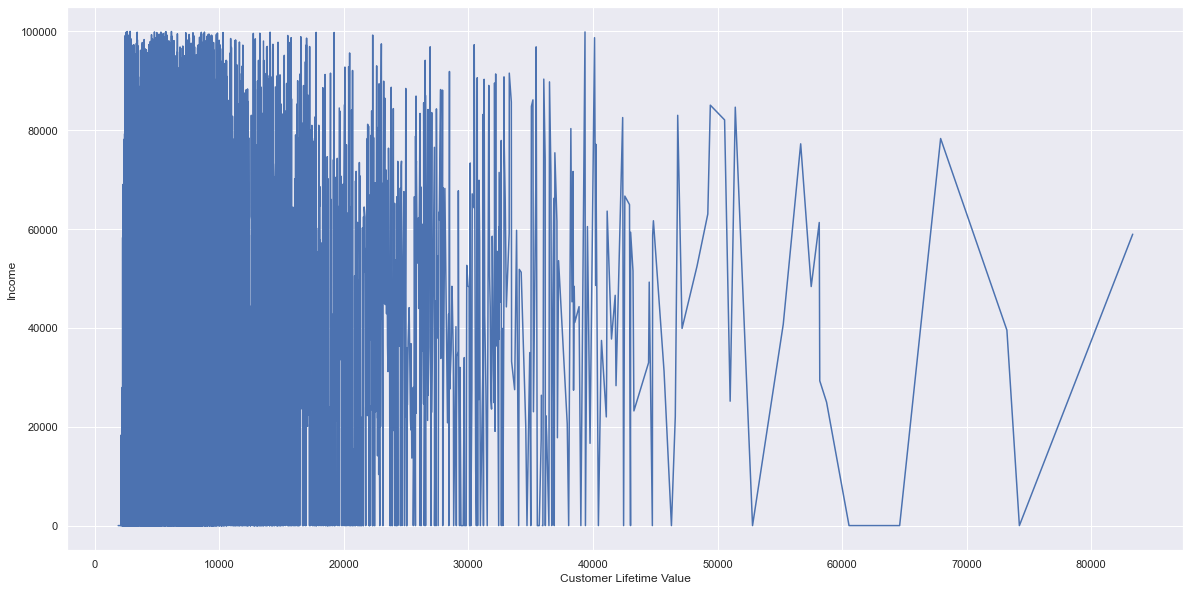

In [15]:
sns.set(style ="darkgrid")
sns.lineplot(x ="Customer Lifetime Value", y ="Income",
            data = df);

## Handling Null Values

<AxesSubplot:>

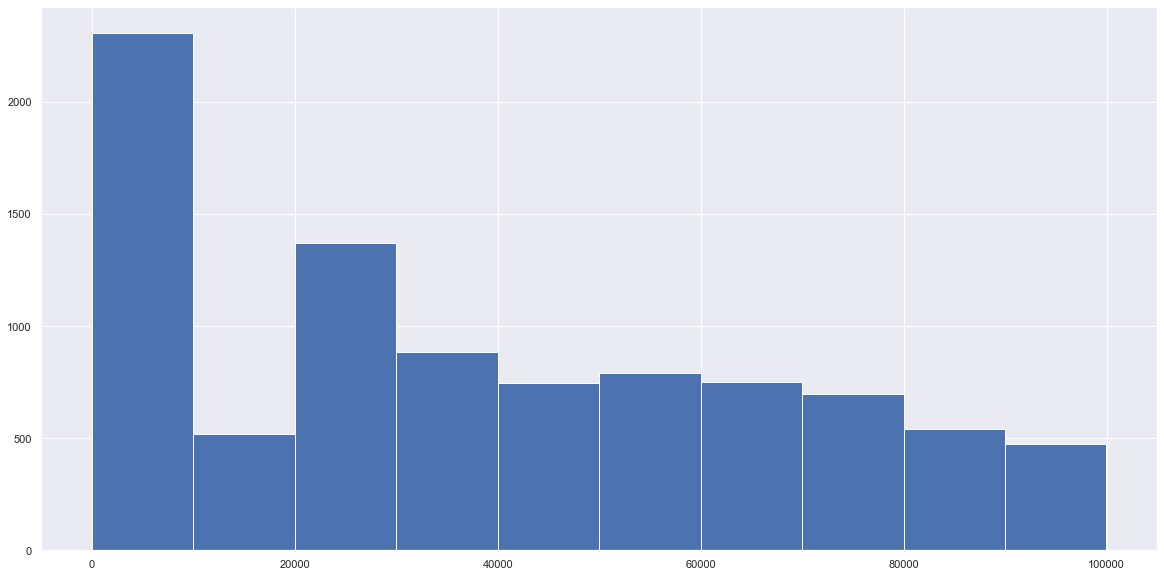

In [16]:
df['Income'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [17]:
df['Income'] = df['Income'].fillna(df['Income'].median())

<AxesSubplot:>

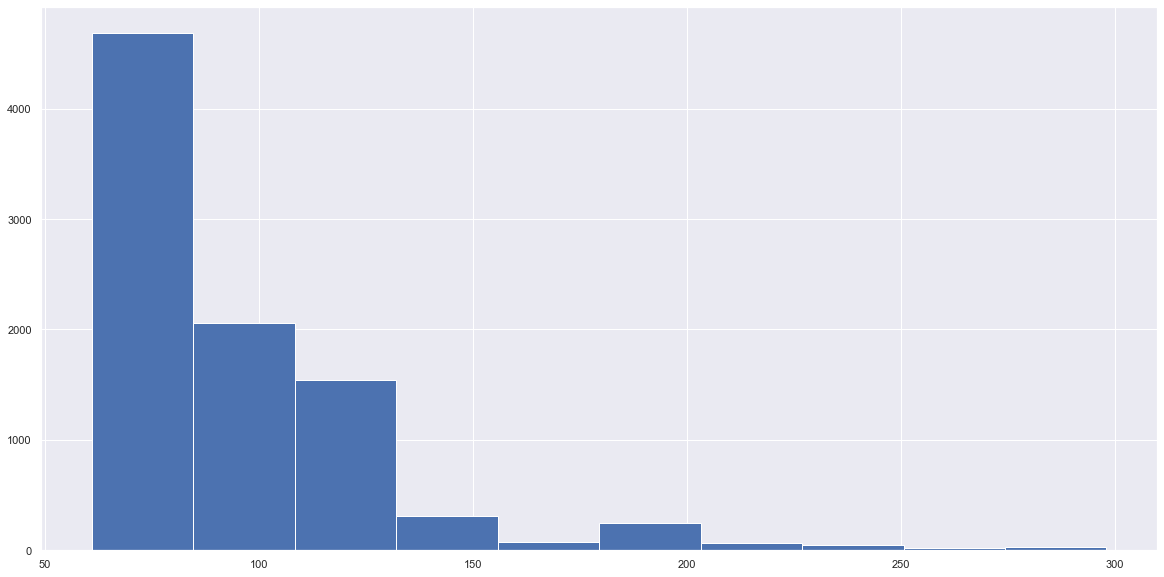

In [18]:
df['Monthly Premium Auto'].hist()

In [19]:
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].median())

<AxesSubplot:>

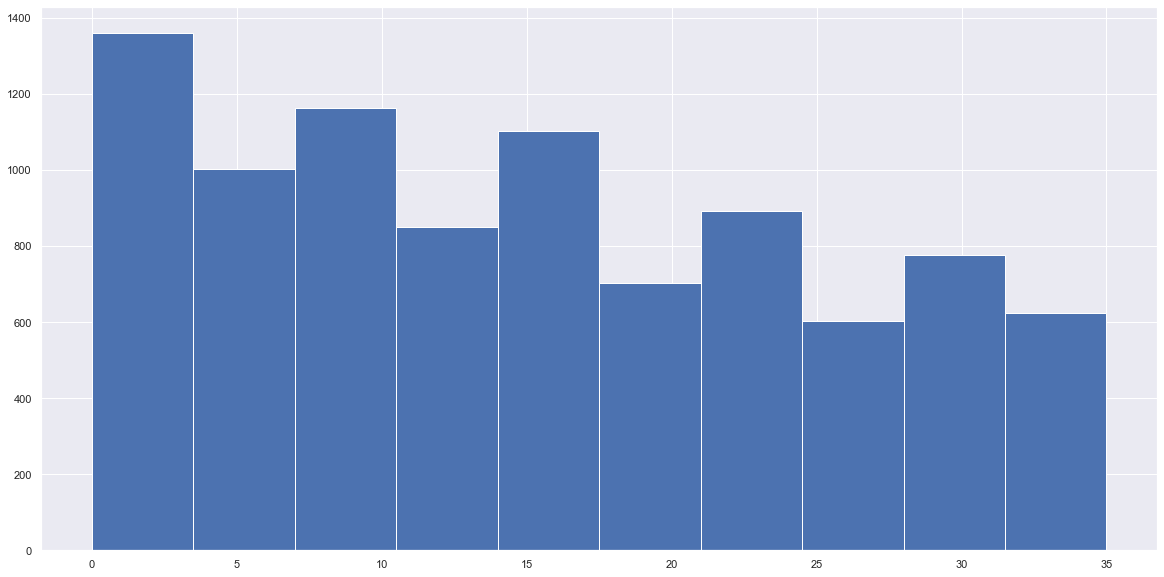

In [20]:
df['Months Since Last Claim'].hist()

In [21]:
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

<AxesSubplot:>

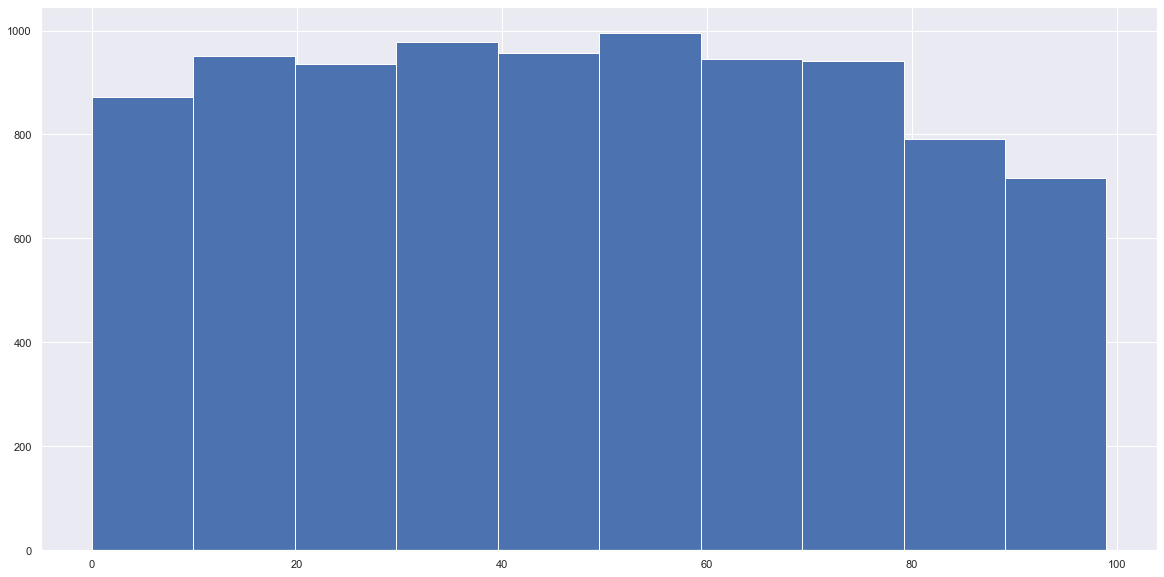

In [22]:
df['Months Since Policy Inception'].hist()

In [23]:
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean())

<AxesSubplot:>

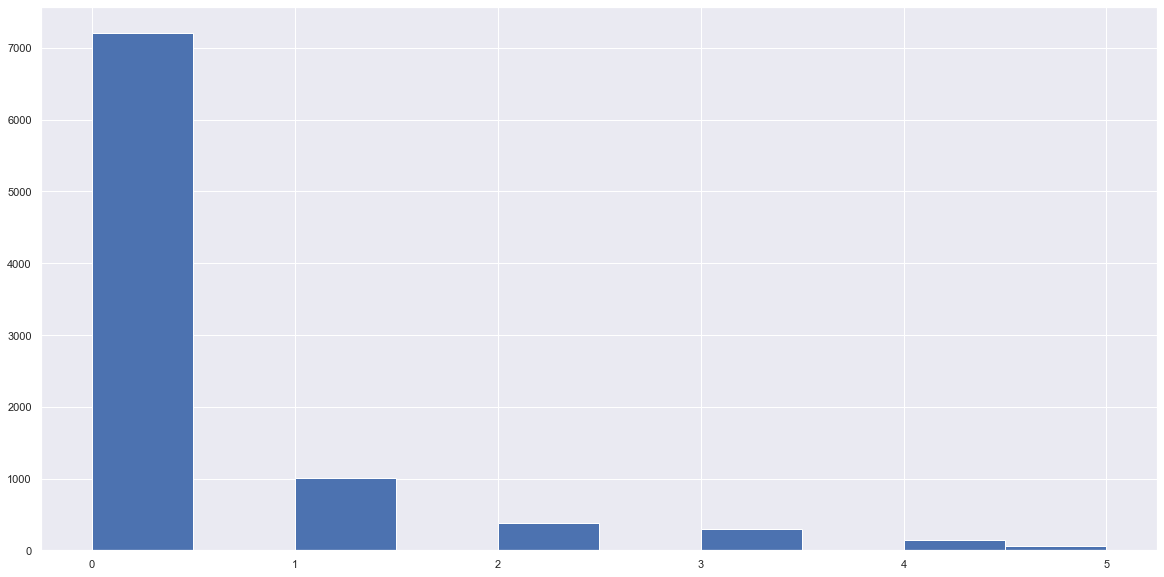

In [24]:
df['Number of Open Complaints'].hist()

In [25]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

<AxesSubplot:>

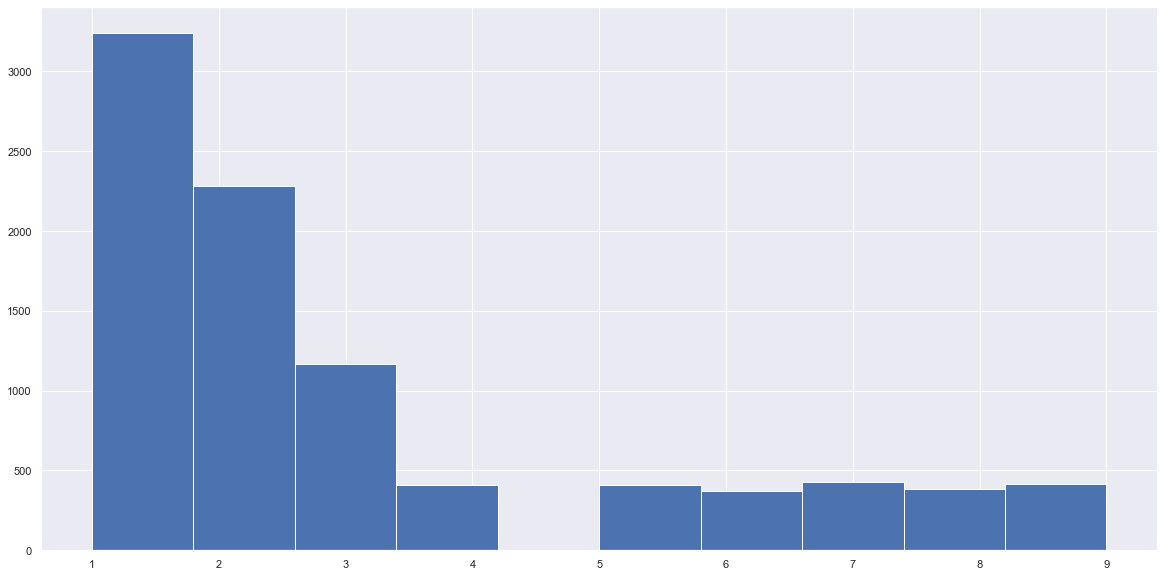

In [26]:
df['Number of Policies'].hist()

In [27]:
df['Number of Policies'] = df['Number of Policies'].fillna(df['Number of Policies'].median())

<AxesSubplot:>

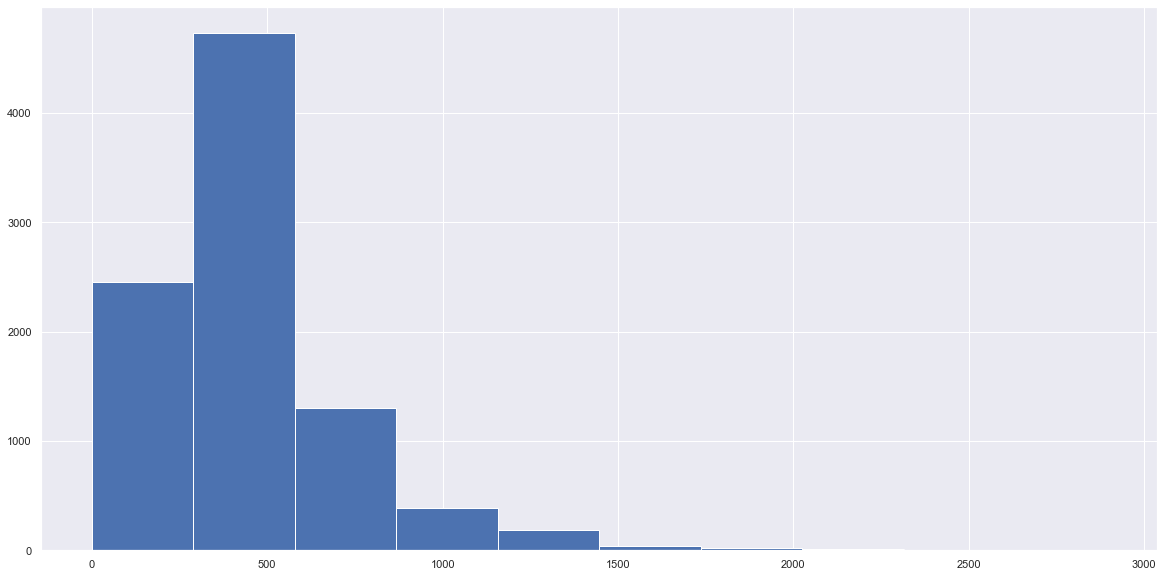

In [28]:
df['Total Claim Amount'].hist()

In [29]:
df['Total Claim Amount'] = df['Total Claim Amount'].fillna(df['Total Claim Amount'].median())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

## Handling Missing Values in Categofrical or Ordinal Variables

<AxesSubplot:>

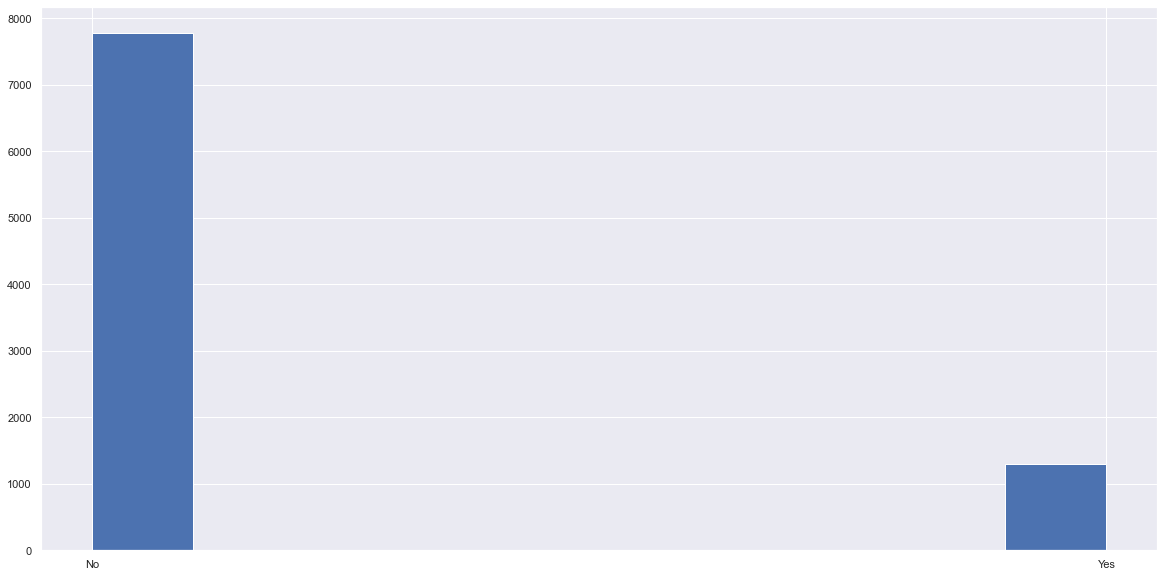

In [31]:
df['Response'].hist()

In [32]:
df['Response'] = df['Response'].fillna(df['Response'].mode()[0])

<AxesSubplot:>

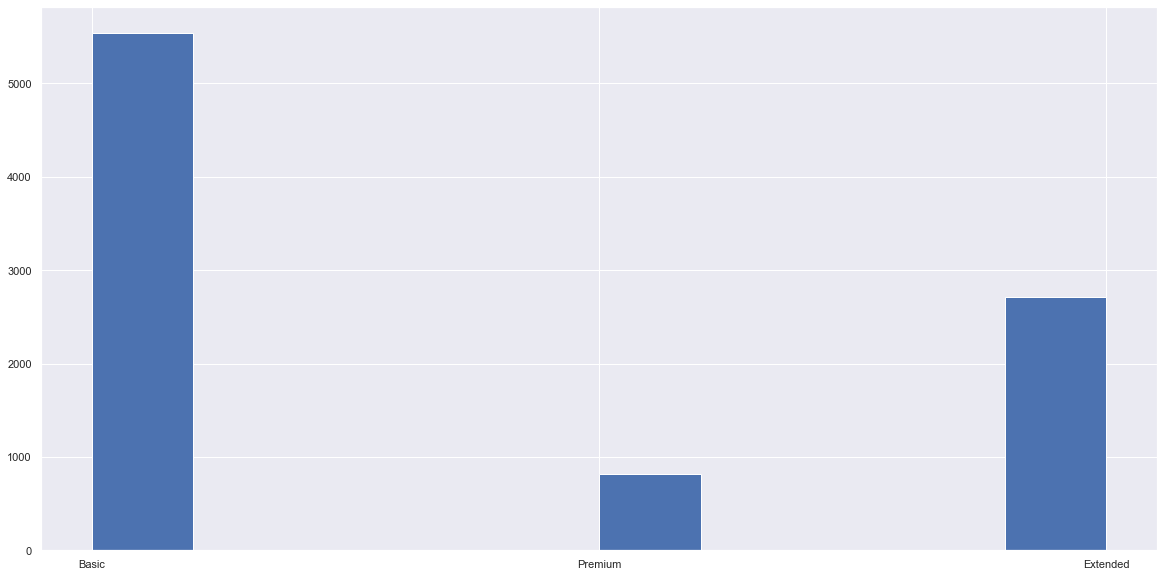

In [33]:
df['Coverage'].hist()

In [34]:
df['Coverage'] = df['Coverage'].fillna(df['Coverage'].mode()[0])

<AxesSubplot:>

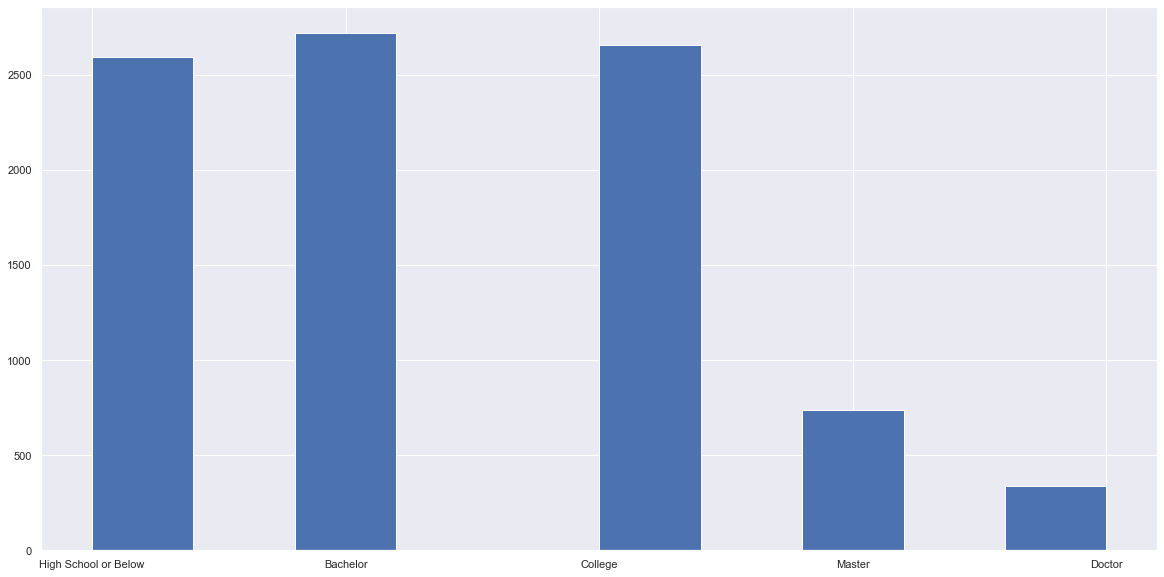

In [35]:
df['Education'].hist()

In [36]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

<AxesSubplot:>

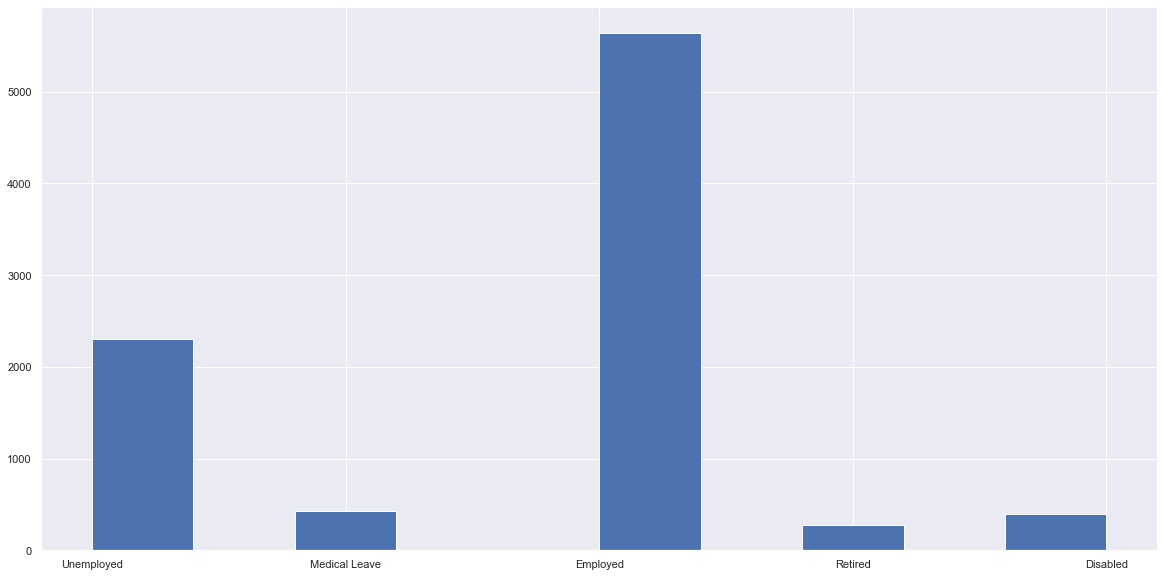

In [37]:
df['EmploymentStatus'].hist()

In [38]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

<AxesSubplot:>

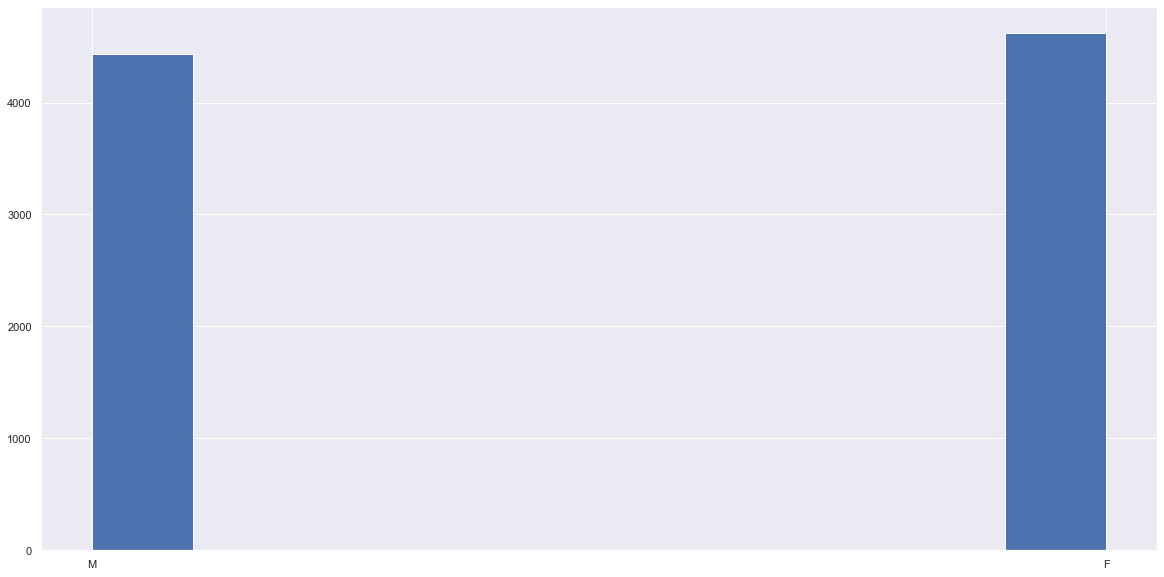

In [39]:
df['Gender'].hist()

In [40]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<AxesSubplot:>

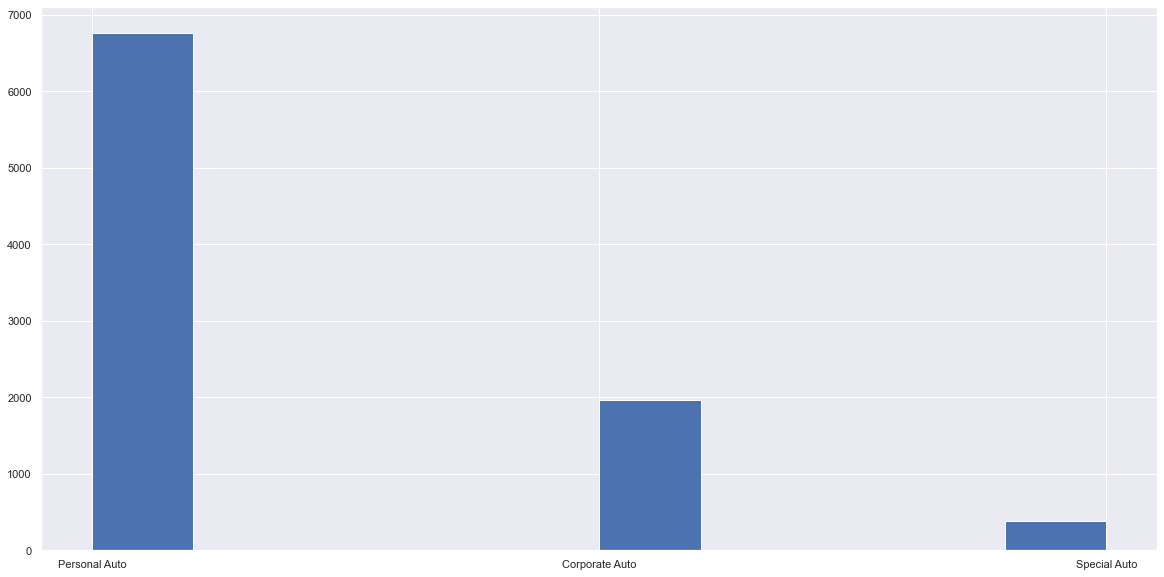

In [41]:
df['Policy Type'].hist()

In [42]:
df['Policy Type'] = df['Policy Type'].fillna(df['Policy Type'].mode()[0])

<AxesSubplot:>

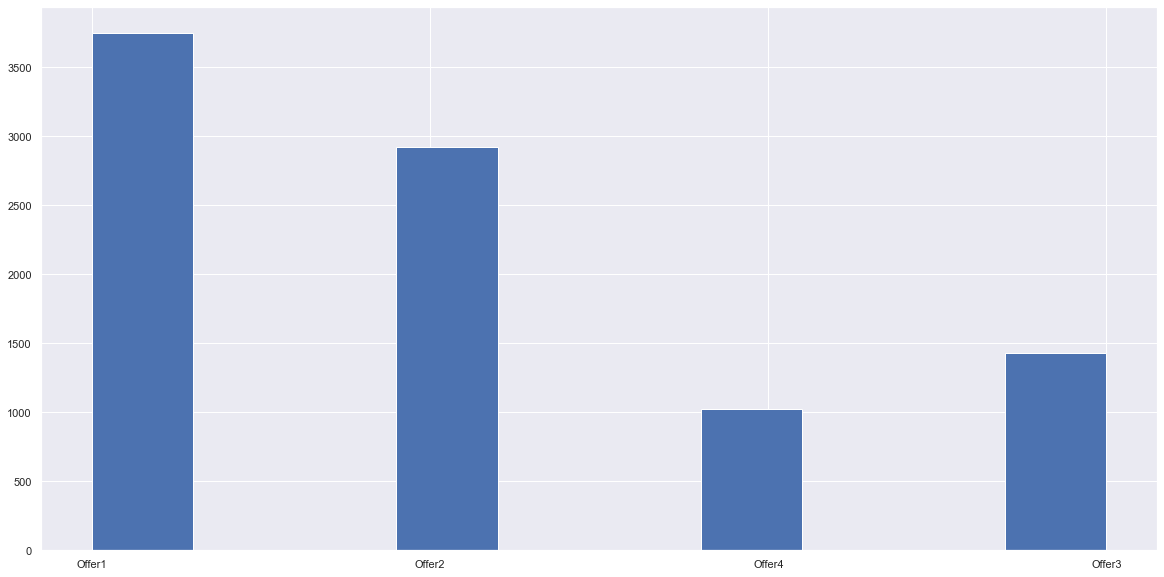

In [43]:
df['Renew Offer Type'].hist()

In [44]:
df['Renew Offer Type'] = df['Renew Offer Type'].fillna(df['Renew Offer Type'].mode()[0])

<AxesSubplot:>

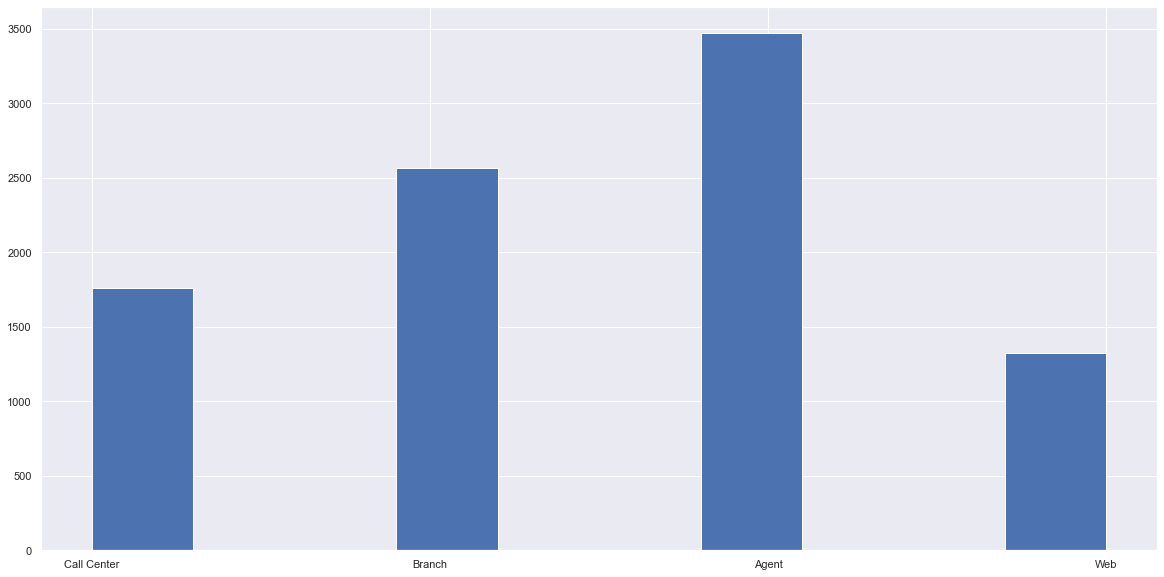

In [45]:
df['Sales Channel'].hist()

In [46]:
df['Sales Channel'] = df['Sales Channel'].fillna(df['Sales Channel'].mode()[0])

<AxesSubplot:>

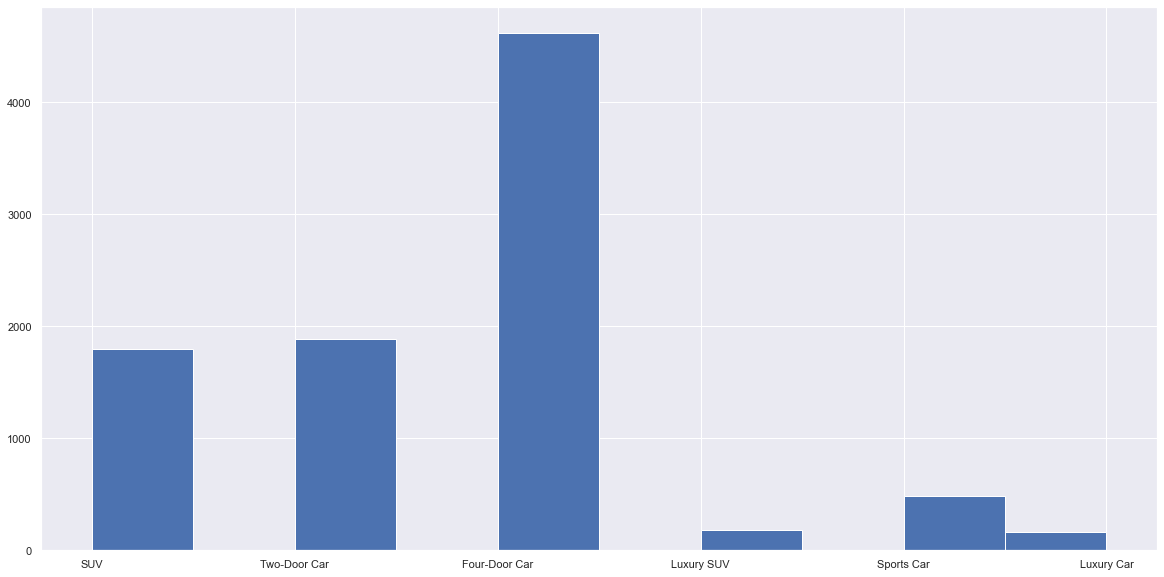

In [47]:
df['Vehicle Class'].hist()

In [48]:
df['Vehicle Class'] = df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0])

<AxesSubplot:>

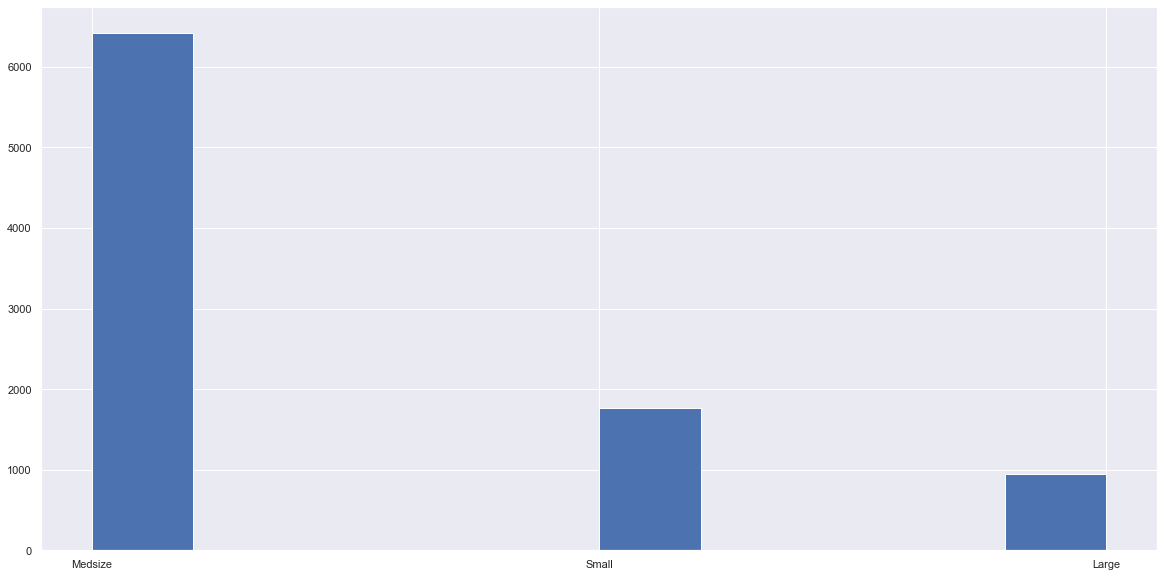

In [49]:
df['Vehicle Size'].hist()

In [50]:
df['Vehicle Size'] = df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0])

<AxesSubplot:>

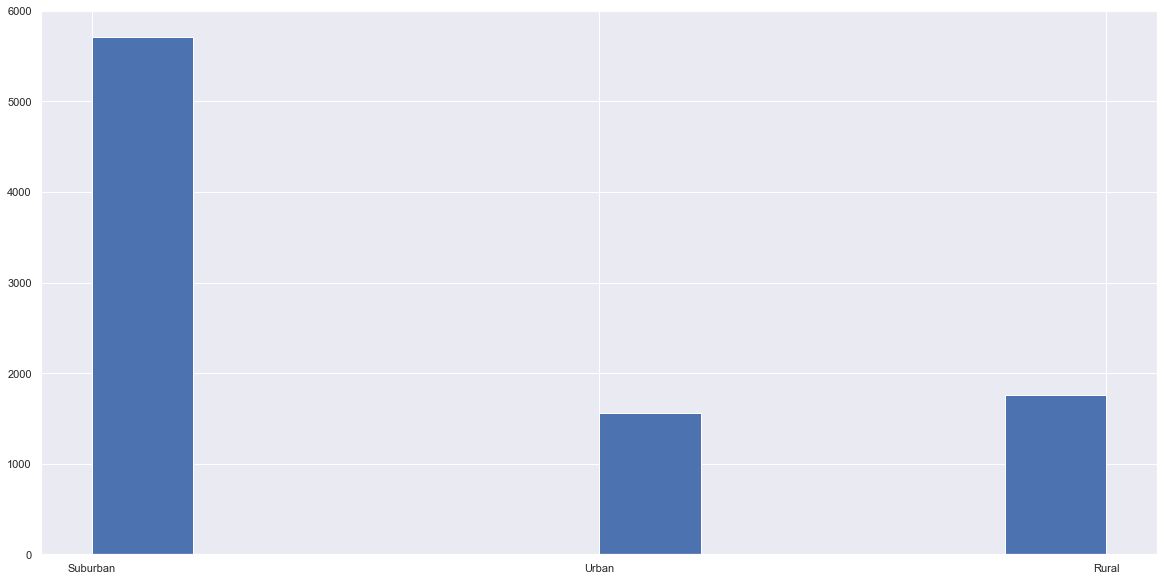

In [51]:
df['Location Code'].hist()

In [52]:
df['Location Code'] = df['Location Code'].fillna(df['Location Code'].mode()[0])

<AxesSubplot:>

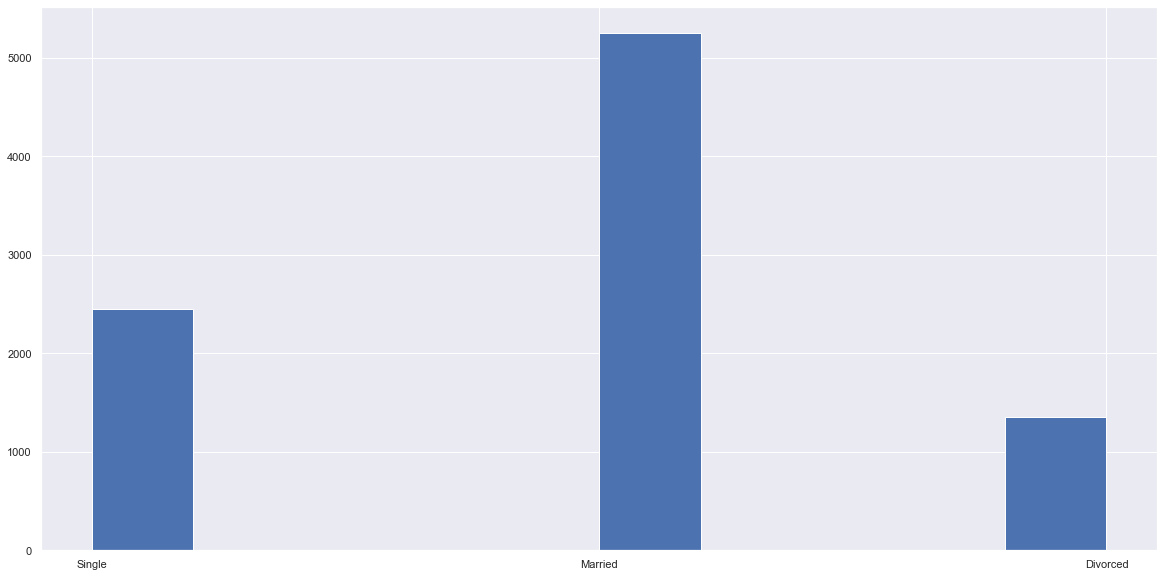

In [53]:
df['Marital Status'].hist()

In [54]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

<AxesSubplot:>

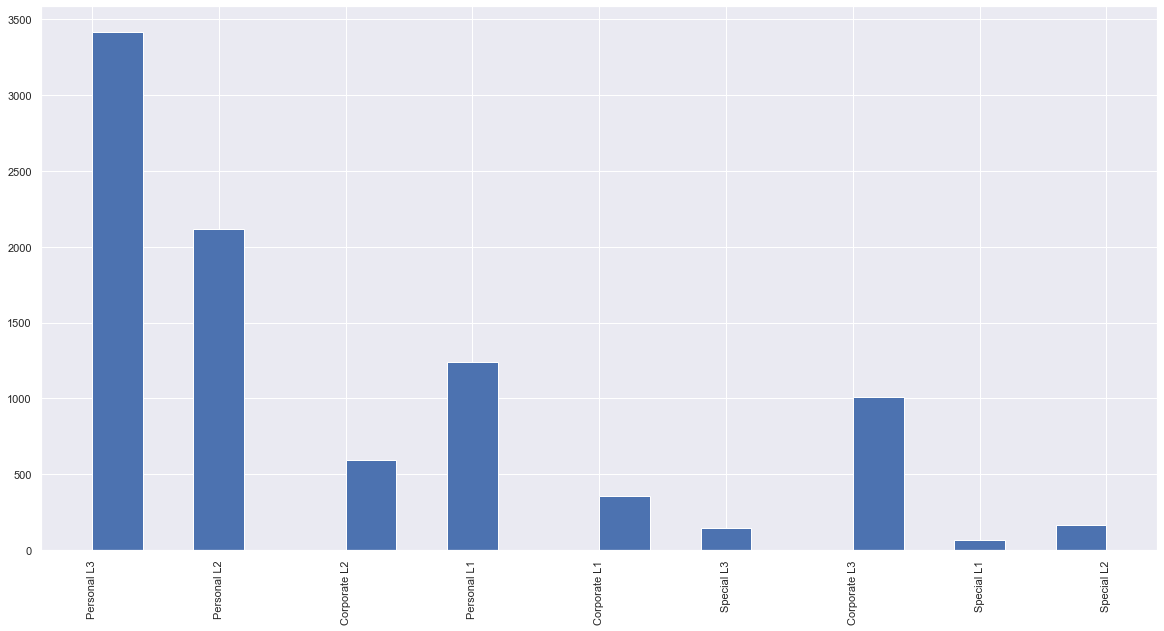

In [55]:
df['Policy'].hist(xrot=90, bins= 20)

In [56]:
df['Policy'] = df['Policy'].fillna(df['Policy'].mode()[0])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

### Dropping non important columns

In [58]:
df = df.drop(['Customer', 'State', 'Effective To Date'], axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   float64
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   float64
 10  Months Since Last Claim        9134 non-null   float64
 11  Months Since Policy Inception  9134 non-null   float64
 12  Number of Open Complaints      9134 non-null   f

### Handling Categorical or Ordinal Variables

#### Plotting histograms for categorical variables

<AxesSubplot:title={'center':'Gender Counts'}>

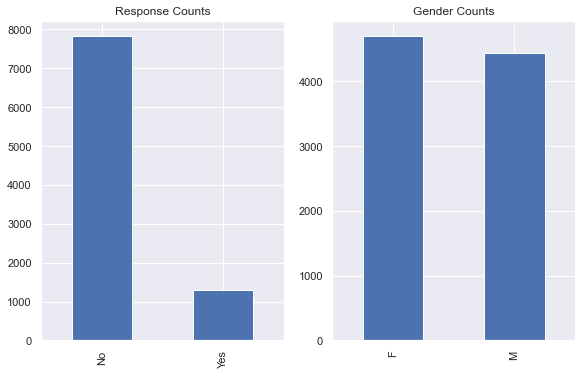

In [60]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Response'].value_counts().plot(kind='bar', 
                                         title='Response Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

The frequent class in column Response is No, so we map 'No' to 1 and 'Yes' to 0.
The frequent class in column Gender is F, so we map 'F' to 1 and 'M' to 0.

In [61]:
df['Response'] = df['Response'].map({'No':1, 'Yes':0}).astype(int)
df['Gender'] = df['Gender'].map({'F':1, 'M':0}).astype(int)

<AxesSubplot:title={'center':'Policy Type Counts'}>

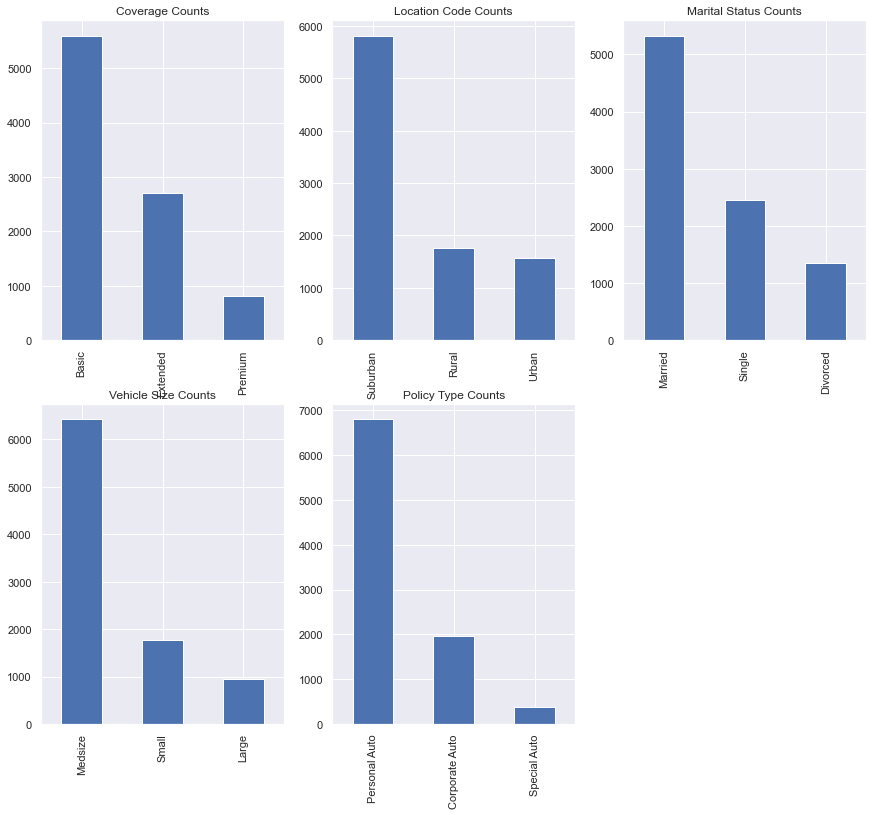

In [62]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Coverage'].value_counts().plot(kind='bar', 
                                         title='Coverage Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Location Code'].value_counts().plot(kind='bar', 
                                         title='Location Code Counts')

plt.subplot2grid(fig_dims, (0, 2))
df['Marital Status'].value_counts().plot(kind='bar', 
                                         title='Marital Status Counts')

plt.subplot2grid(fig_dims, (1, 0))
df['Vehicle Size'].value_counts().plot(kind='bar', 
                                         title='Vehicle Size Counts')

plt.subplot2grid(fig_dims, (1, 1))
df['Policy Type'].value_counts().plot(kind='bar', 
                                         title='Policy Type Counts')

We replace the columns Coverage, Location Code, Martial Status, Vehicle Size and Policy Type with a one-hot-vector of length 3.

In [63]:
cols = pd.get_dummies(df['Coverage'], prefix= 'Coverage')
df[cols.columns] = cols
df.drop('Coverage', axis = 1, inplace = True)

cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

cols = pd.get_dummies(df['Policy Type'], prefix= 'Policy Type')
df[cols.columns] = cols
df.drop('Policy Type', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Sales Channel Counts'}>

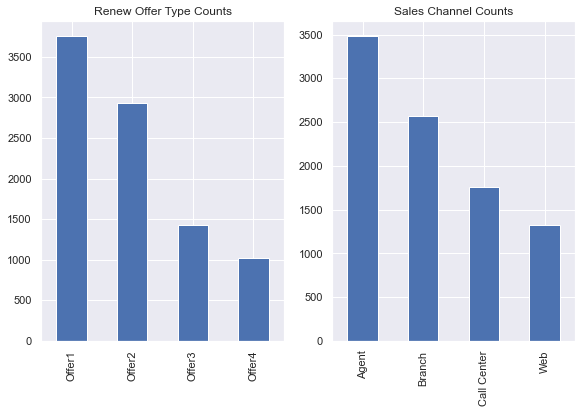

In [64]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Renew Offer Type'].value_counts().plot(kind='bar', 
                                         title='Renew Offer Type Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['Sales Channel'].value_counts().plot(kind='bar', 
                                         title='Sales Channel Counts')

Here, we replace the columns Renew Offer Type and Sales Channel with a one-hot-vector of length 4.

In [65]:
cols = pd.get_dummies(df['Renew Offer Type'], prefix= 'Renew Offer Type')
df[cols.columns] = cols
df.drop('Renew Offer Type', axis = 1, inplace = True)

cols = pd.get_dummies(df['Sales Channel'], prefix= 'Sales Channel')
df[cols.columns] = cols
df.drop('Sales Channel', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Employment Status Counts'}>

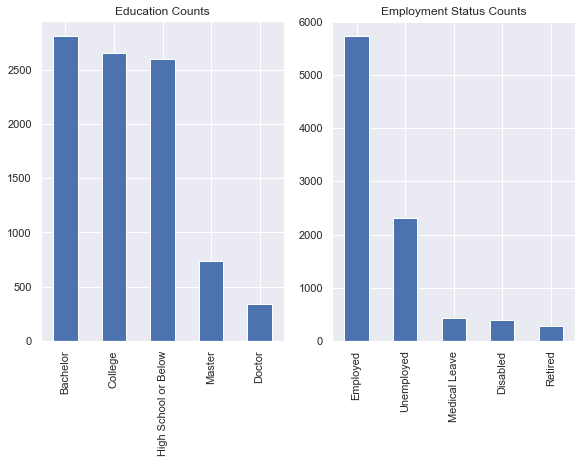

In [66]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Education'].value_counts().plot(kind='bar', 
                                         title='Education Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['EmploymentStatus'].value_counts().plot(kind='bar', 
                                         title='Employment Status Counts')

Now, we replace the columns Education and Employment Status with a one-hot-vector of length 5.

In [67]:
cols = pd.get_dummies(df['Education'], prefix= 'Education')
df[cols.columns] = cols
df.drop('Education', axis = 1, inplace = True)

cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Vehicle Class Counts'}>

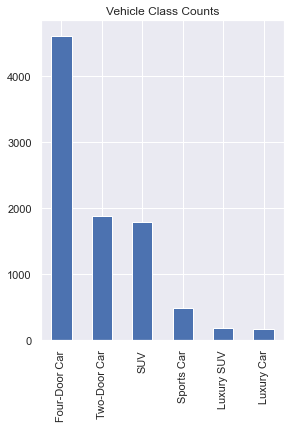

In [68]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Vehicle Class'].value_counts().plot(kind='bar', 
                                         title='Vehicle Class Counts')

Now, we replace the column Vehicle Class with a one-hot-vector of length 6.

In [69]:
cols = pd.get_dummies(df['Vehicle Class'], prefix= 'Vehicle Class')
df[cols.columns] = cols
df.drop('Vehicle Class', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Policy Counts'}>

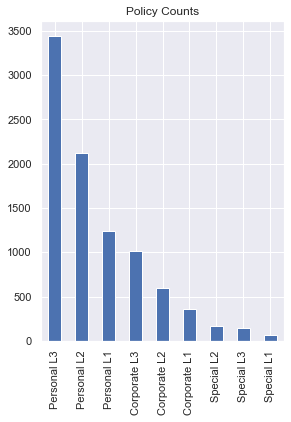

In [70]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Policy'].value_counts().plot(kind='bar', 
                                         title='Policy Counts')

Finally, we replace the column Policy with a one-hot-vector of length 9.

In [71]:
cols = pd.get_dummies(df['Policy'], prefix= 'Policy')
df[cols.columns] = cols
df.drop('Policy', axis = 1, inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Response                        9134 non-null   int64  
 2   Gender                          9134 non-null   int64  
 3   Income                          9134 non-null   float64
 4   Monthly Premium Auto            9134 non-null   float64
 5   Months Since Last Claim         9134 non-null   float64
 6   Months Since Policy Inception   9134 non-null   float64
 7   Number of Open Complaints       9134 non-null   float64
 8   Number of Policies              9134 non-null   float64
 9   Total Claim Amount              9134 non-null   float64
 10  Coverage_Basic                  9134 non-null   uint8  
 11  Coverage_Extended               9134 non-null   uint8  
 12  Coverage_Premium                91

### Splitting the data set

Our Target variable is Customer Lifetime Value

In [73]:
x = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

Splitting the dataframe into train and test data sets.

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

### Scalling the data

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Income'>,
        <AxesSubplot:xlabel='Total Claim Amount', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Monthly Premium Auto'>,
     

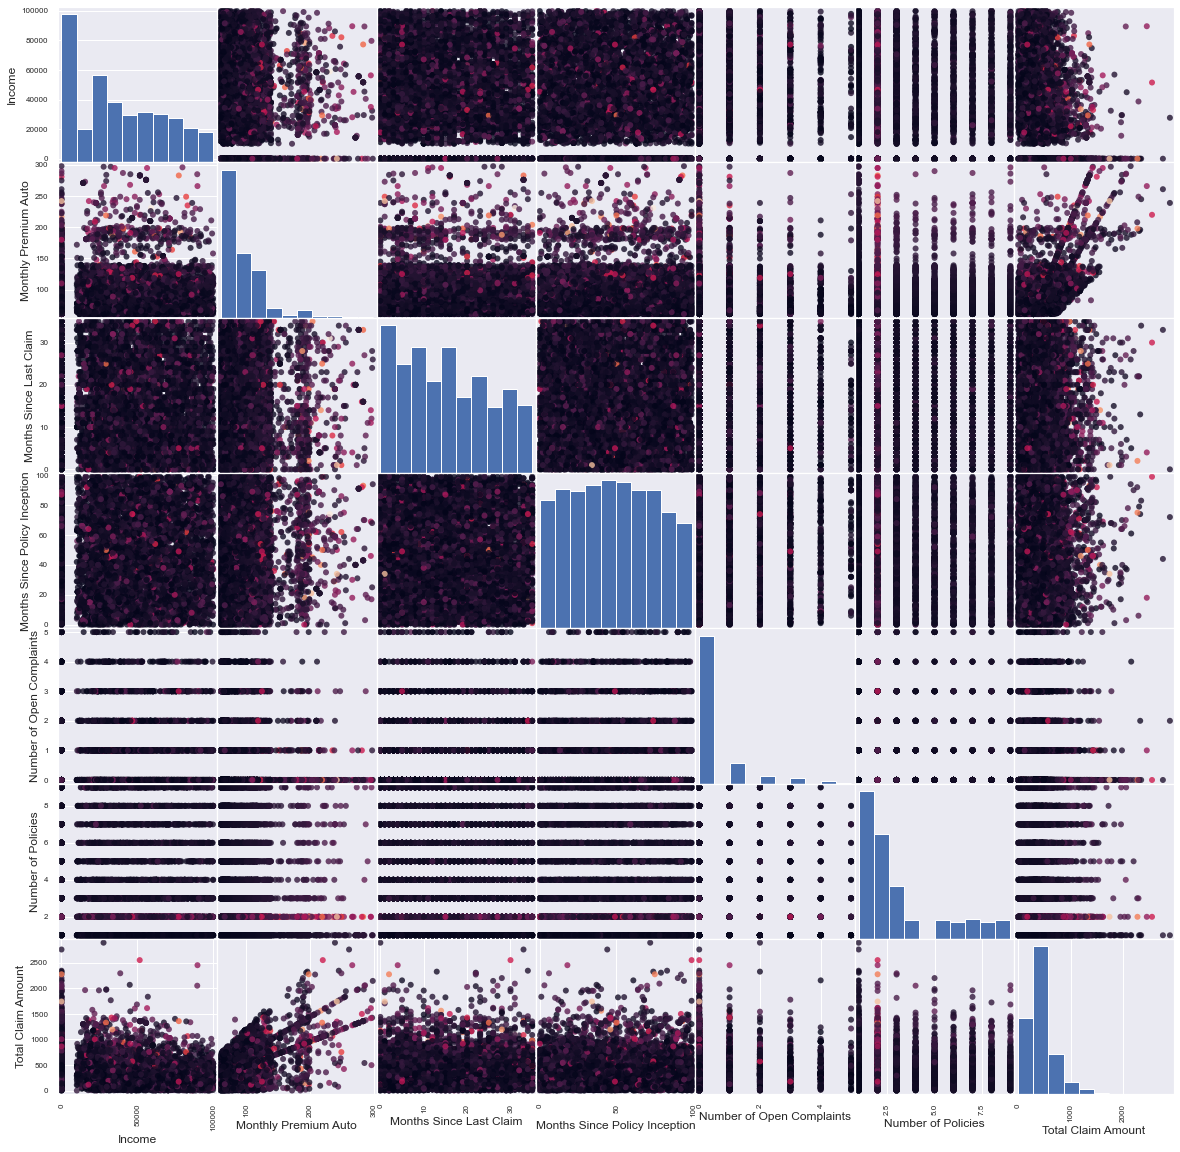

In [75]:
from pandas.plotting import scatter_matrix
attributes = ['Income','Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Number of Open Complaints',
              'Number of Policies', 'Total Claim Amount']
scatter_matrix(x[attributes], figsize = (20, 20), c = y, alpha = 0.8, marker = 'O')

In [76]:
x[attributes].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37610.040289,93.159185,15.096562,48.052406,0.383403,2.963652,434.088794
std,30299.572999,34.332429,10.046987,27.802299,0.910258,2.387739,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33881.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62049.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data.

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Final Processed Train and Test Dataset

In [78]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,1.0,0.285184,0.164557,0.114286,0.222222,0.2,0.125,0.165875,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.371451,0.092827,0.342857,0.010101,0.4,1.000,0.144198,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.000000,0.088608,0.000000,0.282828,0.0,0.000,0.204035,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.294916,0.004219,0.542857,0.737374,0.0,0.000,0.002609,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.639482,0.540084,0.114286,0.292929,0.0,0.500,0.264388,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.0,1.0,0.607635,0.025316,0.114286,0.191919,0.0,0.750,0.143100,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.682740,0.172996,0.314286,0.818182,0.0,0.375,0.029034,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.000000,0.050633,0.342857,0.424242,0.0,0.750,0.274562,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.587892,0.274262,0.171429,0.626263,0.0,0.125,0.104362,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.788940,0.033755,0.257143,0.676768,0.2,0.375,0.161234,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Machine Learning Models

### Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

Performing K-Fold Cross Validation

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=20)

test_scores = cross_val_score(lreg, x_test, y_test, cv=kfold)
train_scores = cross_val_score(lreg, x_train, y_train, cv=kfold)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))

Train Cross-validation scores:
[0.15327176 0.16598217 0.15477262 0.2405238  0.2163021  0.20216546
 0.1571046  0.12819125 0.18993258 0.1428755  0.10275639 0.12691869
 0.21618694 0.09772405 0.13995109 0.19379016 0.16442719 0.08985155
 0.11099459 0.10525348]
Average Train Cross-validation score:0.15494879915409954


In [115]:
print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean()))

Test Cross-validation scores:
[-3.89431868e-02  2.48252400e-01  5.39209836e-02  7.96167115e-02
  2.78645800e-01  6.75285140e-02 -5.08103084e-02  1.79170143e-01
  1.44718096e-01  2.00911111e-01 -4.14040392e-02  6.22140630e-03
 -1.71237578e+24  1.35449083e-01  3.38688976e-02 -1.39401063e-02
  1.89894427e-01  2.06673980e-01  7.53318136e-02  3.20135359e-02]
Average Test Cross-validation score:-8.56187891777048e+22


### KNN Regression

Grid Search with cross validation

In [223]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15]}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

In [224]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 7, 10, 15]},
             return_train_score=True)

In [225]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.10


In [226]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028625,0.003980,0.608552,0.051218,1,{'n_neighbors': 1},-0.321865,-0.497977,-0.549508,-0.651466,...,-0.496751,0.108120,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.029086,0.001739,0.687486,0.096170,2,{'n_neighbors': 2},-0.075861,-0.109969,-0.088580,-0.167465,...,-0.111557,0.031462,4,0.621085,0.633027,0.621880,0.629977,0.627622,0.626718,0.004613
2,0.030038,0.001632,0.705586,0.083112,7,{'n_neighbors': 7},0.089275,0.069479,0.089060,0.056581,...,0.076107,0.012380,3,0.318795,0.323361,0.310049,0.325061,0.314350,0.318323,0.005572
3,0.029179,0.001412,0.728442,0.084185,10,{'n_neighbors': 10},0.100195,0.068363,0.109997,0.092548,...,0.087581,0.017248,2,0.257969,0.265412,0.255487,0.262061,0.262494,0.260685,0.003519
4,0.028545,0.001857,0.729124,0.084581,15,{'n_neighbors': 15},0.105979,0.091396,0.107043,0.109533,...,0.098884,0.011185,1,0.216943,0.217293,0.210252,0.217097,0.211154,0.214548,0.003154


### Ridge

In [234]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))

In [235]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

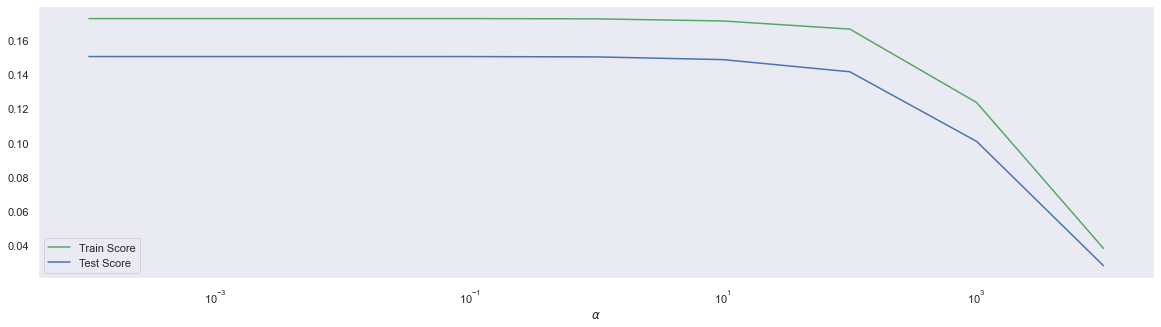

In [236]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [237]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


In [238]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003680,0.000215,0.000705,0.000118,0.0001,{'alpha': 0.0001},0.172101,0.171515,0.143926,0.165536,...,0.153684,0.021738,6,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
1,0.004094,0.000560,0.000779,0.000172,0.001,{'alpha': 0.001},0.172107,0.171515,0.143927,0.165542,...,0.153687,0.021739,5,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
2,0.003421,0.000647,0.000623,0.000112,0.01,{'alpha': 0.01},0.172165,0.171521,0.143932,0.165604,...,0.153718,0.021748,4,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
3,0.004099,0.000212,0.000631,0.000105,0.1,{'alpha': 0.1},0.172664,0.171574,0.143987,0.166152,...,0.153989,0.021827,3,0.168133,0.170349,0.176927,0.170801,0.184404,0.174123,0.005911
4,0.003811,0.000438,0.000732,0.000095,1,{'alpha': 1},0.174495,0.171657,0.144492,0.168498,...,0.155096,0.022113,2,0.168004,0.170121,0.176737,0.170400,0.184111,0.173875,0.005892


### Lasso

In [239]:
from sklearn.linear_model import Lasso

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))

/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124098916630.57707, tolerance: 32588524.01072378
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50916448475.59369, tolerance: 32588524.01072378
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48848432090.411194, tolerance: 32588524.01072378
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/pyth

In [240]:
lasso = Lasso()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2')

grid_search.fit(x_train, y_train)

/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98908540805.61455, tolerance: 25470146.493289296
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102307423268.15146, tolerance: 25801272.553657595
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93389525498.75844, tolerance: 26232105.17259673
  model = cd_fast.enet_coordinate_descent(
/Users/divyanshdahiya/opt/anaconda3/lib/pyt

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

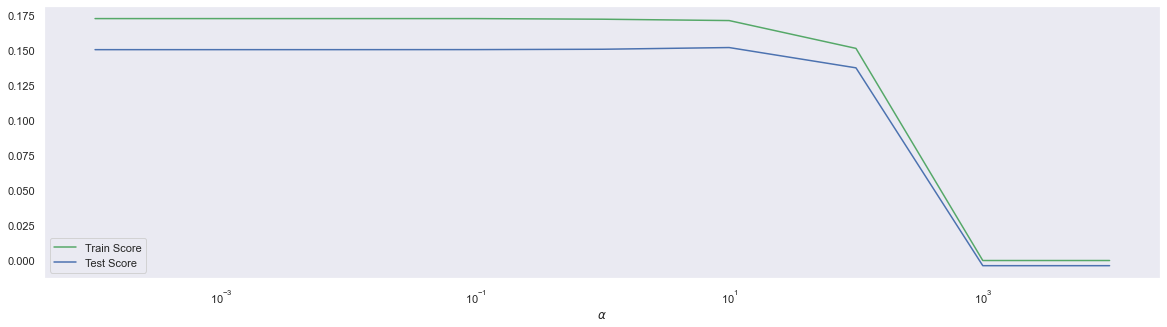

In [241]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [242]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


In [243]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.250359,0.020279,0.001220,0.000268,0.0001,{'alpha': 0.0001},0.172105,0.171517,0.143925,0.165541,...,0.153686,0.021740,6,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
1,0.253109,0.033609,0.001115,0.000330,0.001,{'alpha': 0.001},0.172118,0.171517,0.143926,0.165546,...,0.153691,0.021742,5,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
2,0.252939,0.029320,0.001106,0.000097,0.01,{'alpha': 0.01},0.172244,0.171526,0.143931,0.165596,...,0.153734,0.021760,4,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
3,0.212651,0.038195,0.000847,0.000159,0.1,{'alpha': 0.1},0.173512,0.171656,0.143946,0.166105,...,0.154169,0.021965,3,0.168125,0.170347,0.176925,0.170805,0.184404,0.174121,0.005913
4,0.055068,0.014909,0.000569,0.000013,1,{'alpha': 1},0.177390,0.172802,0.144369,0.170004,...,0.156392,0.022631,2,0.167936,0.169646,0.176586,0.169981,0.183667,0.173563,0.005849


### LinearSVR

In [120]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

lsvr = LinearSVR()
grid_search = GridSearchCV(lsvr, param_grid, cv=5, return_train_score=True)

In [121]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [122]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.02


In [123]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005110,0.000507,0.000654,0.000085,0.001,{'C': 0.001},-1.276316,-1.335675,-1.453613,-1.459946,...,-1.394432,0.074728,6,-1.421005,-1.403530,-1.373937,-1.374554,-1.375537,-1.389713,0.019234
1,0.005964,0.000833,0.000766,0.000173,0.01,{'C': 0.01},-1.158506,-1.213516,-1.321653,-1.322674,...,-1.266326,0.067892,5,-1.290619,-1.274438,-1.247248,-1.248937,-1.248921,-1.262033,0.017510
2,0.006490,0.000684,0.000700,0.000128,0.1,{'C': 0.1},-0.504421,-0.537140,-0.591227,-0.566831,...,-0.557149,0.032482,4,-0.567798,-0.559972,-0.548485,-0.551257,-0.548055,-0.555113,0.007657
3,0.005682,0.000267,0.000561,0.000021,1,{'C': 1},-0.109802,-0.125225,-0.146278,-0.121185,...,-0.130538,0.015362,3,-0.134808,-0.128792,-0.126029,-0.128568,-0.126383,-0.128916,0.003150
4,0.005885,0.000076,0.000572,0.000043,10,{'C': 10},0.028407,0.030349,0.004073,0.045425,...,0.018063,0.022353,2,0.018481,0.020362,0.022185,0.019879,0.025015,0.021184,0.002252


### SVR (Kernel = Linear)

In [77]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel':['linear']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)

In [78]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             return_train_score=True)

In [79]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.04


In [80]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.705847,0.037179,0.320928,0.006155,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",-0.091932,-0.096811,-0.113438,...,-0.102945,0.011802,6,-0.101337,-0.101518,-0.100298,-0.104336,-0.104639,-0.102426,0.001737
1,1.699585,0.097029,0.332934,0.036543,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",-0.090999,-0.095843,-0.113083,...,-0.102052,0.011935,5,-0.100355,-0.100528,-0.099912,-0.103156,-0.103606,-0.101511,0.001546
2,1.684856,0.021680,0.323579,0.008700,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",-0.082296,-0.086866,-0.104451,...,-0.093627,0.012029,4,-0.091246,-0.091323,-0.091359,-0.095452,-0.095302,-0.092936,0.001994
3,1.688515,0.030515,0.325037,0.007638,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.037573,-0.039588,-0.058256,...,-0.046310,0.012223,3,-0.045586,-0.043224,-0.044908,-0.047853,-0.043289,-0.044972,0.001707
4,1.737683,0.014582,0.327624,0.008775,10,linear,"{'C': 10, 'kernel': 'linear'}",0.046863,0.055301,0.030752,...,0.042624,0.021810,1,0.044927,0.045420,0.045665,0.043073,0.047476,0.045312,0.001413


### SVR(Kernel = Poly)

In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [ 0.1, 1, 10], 
              'gamma': [ 0.1, 1, 10], 
              'kernel':['poly']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

In [ ]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

### SVR (Kernel = rbf)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': [0.01, 0.1, 1, 10, 100], 
              'kernel':['rbf']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

In [ ]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

### Decision Tree Regression

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_depth': [2,5,7,15, 30 ], 
               'min_samples_leaf': [10,40,60, 80 ,100]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=10, return_train_score=True)

In [85]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 7, 15, 30],
                         'min_samples_leaf': [10, 40, 60, 80, 100]},
             return_train_score=True)

In [86]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 60}
Best cross-validation score: 0.67


### Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [30], 
              'min_samples_leaf': [10]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring = 'r2')

In [87]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30], 'min_samples_leaf': [10]},
             return_train_score=True, scoring='r2')

In [88]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 30, 'min_samples_leaf': 10}
Best cross-validation score: 0.69
